<a href="https://colab.research.google.com/github/nasarmientoo/diq_boston_crimes/blob/main/1_Data_Quality_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. DATA QUALITY ASSESSMENT**

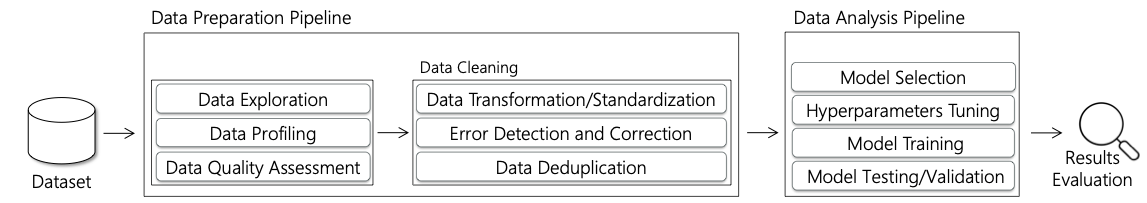

Import libraries:

In [17]:
import pandas as pd
import numpy as np
from datetime import datetime

Import data:

# Nueva sección

In [19]:
boston_crimes = pd.read_csv('sample_data/crime.csv',encoding='unicode_escape')
boston_crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


Basic operation to inspect data:

In [20]:
#number of tuples and columns of the data source
boston_crimes.shape

(319073, 17)

In [21]:
#show the schema of the data source
boston_crimes.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

In [22]:
#for each attribute the system shows the type of data. The type of data is defined analyzing the values
boston_crimes.dtypes

,0
INCIDENT_NUMBER,object
OFFENSE_CODE,int64
OFFENSE_CODE_GROUP,object
OFFENSE_DESCRIPTION,object
DISTRICT,object
REPORTING_AREA,object
SHOOTING,object
OCCURRED_ON_DATE,object
YEAR,int64
MONTH,int64


In [23]:
#unique display the list of distinct values in a column
boston_crimes['SHOOTING'].unique()

array([nan, 'Y'], dtype=object)

In [24]:
#nunique counts the number of distinct values
boston_crimes['SHOOTING'].nunique()

1

In [25]:
#value_counts() returns an object containing counts for each unique value
shooting_count = boston_crimes['SHOOTING'].value_counts()

In [26]:
shooting_count

,count
SHOOTING,
Y,1019


In [27]:
offense_count = boston_crimes['OFFENSE_CODE'].value_counts()
offense_count

,count
OFFENSE_CODE,
3006,18783
3115,18754
3831,16323
1402,15154
802,14799
...,...
404,1
112,1
2609,1


In [28]:
#here we want to inspect how many unique values have the same count
offense_count.value_counts()

,count
count,
1,24
2,10
10,3
13,3
27,2
...,...
981,1
968,1
966,1


**DUPLICATION**

Duplication occurs when a real-world entity is stored twice or more in a data source.

*Definition*: A measure of unwanted duplication existing within a data set.

*Evaluation*: Number of duplicates

In [29]:
#duplicated returns a boolean Series denoting the duplicate rows (exact matching)
incident_duplicate = boston_crimes.duplicated("INCIDENT_NUMBER")
incident_duplicate

,0
0,False
1,False
2,False
3,False
4,False
...,...
319068,False
319069,False
319070,True
319071,False


In [42]:
#any shows if duplicates exist
print(incident_duplicate.any())
print(incident_duplicate.isnull().any())

True
False


In [48]:
boston_crimes[incident_duplicate]
incident_duplicate.count()


319073

**COMPLETENESS**

The completeness of a table characterizes the extent to which a table represents the corresponding real world.

Completeness in the relational model can be characterized by the presence of null values. In a model with null values, the presence of a null value has the general meaning of a missing value, i.e., a value that exist in the real-world but it is not available.

*Definition*: The degree to which a given data collection includes the data describing the corresponding set of real-world objects.

*Evaluation*: Number of not null values / Total number of values

In [49]:
#isnull() shows which values are null
boston_crimes.isnull()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319069,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319070,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319071,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [50]:
boston_crimes.isnull().count()

,0
INCIDENT_NUMBER,319073
OFFENSE_CODE,319073
OFFENSE_CODE_GROUP,319073
OFFENSE_DESCRIPTION,319073
DISTRICT,319073
REPORTING_AREA,319073
SHOOTING,319073
OCCURRED_ON_DATE,319073
YEAR,319073
MONTH,319073


In [53]:
#display the number of not null values for each column
not_null_values=boston_crimes.count()
not_null_values

,0
INCIDENT_NUMBER,319073
OFFENSE_CODE,319073
OFFENSE_CODE_GROUP,319073
OFFENSE_DESCRIPTION,319073
DISTRICT,317308
REPORTING_AREA,319073
SHOOTING,1019
OCCURRED_ON_DATE,319073
YEAR,319073
MONTH,319073


In [54]:
#display the number of null values for each column
boston_crimes.isnull().sum()

,0
INCIDENT_NUMBER,0
OFFENSE_CODE,0
OFFENSE_CODE_GROUP,0
OFFENSE_DESCRIPTION,0
DISTRICT,1765
REPORTING_AREA,0
SHOOTING,318054
OCCURRED_ON_DATE,0
YEAR,0
MONTH,0


In [55]:
#total number of null values
null_values = boston_crimes.isnull().sum().sum()
boston_crimes.isnull().sum().sum()

370778

In [56]:
#total number of cells
total = boston_crimes.shape[0]*boston_crimes.shape[1]
total

5424241

COMPLETENESS EVALUATION:

In [57]:
completeness = not_null_values / total

In [61]:
completeness = '{0:.1f}%'.format(completeness*100)
print(completeness)

TypeError: unsupported format string passed to Series.__format__

Dealing with missing values with a different format:

In [62]:
boston_crimes.isnull()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319069,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319070,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
319071,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


**ACCURACY**

*Definition*: The extent to which data are correct, reliable and certified.

Syntactic Accuracy is the closeness of a value v to the elements of the corresponding definition domain D.

Semantic Accuracy is defined as the closeness between a data value v and a data value v’.

It is possible to calculate the accuracy of an attribute, i.e., attribute (or column) accuracy, of a relation, i.e., relation accuracy, or of a whole database, i.e., database accuracy.

*Evaluation*: Number of accurate values / Total number of values

In [ ]:
#now we check if the values attribute style in beers contain errors
BEERS = pd.read_csv('https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/BEERS.csv')

In [ ]:
#correct values in beers are the ones contained in styles
CORRECT = BEERS['style'].isin(STYLES['style'])
CORRECT

,style
0,True
1,True
2,True
3,True
4,True
...,...
2414,True
2415,True
2416,True
2417,True


In [ ]:
#we sum the true values in correct
CORRECT_STYLE = np.sum(CORRECT)
CORRECT_STYLE

2406

In [ ]:
#we count the not null values of the column style in beers
NOT_NULL_STYLE = BEERS['style'].count()
NOT_NULL_STYLE

2414

ACCURACY EVALUATION:

In [ ]:
ACCURACY_STYLE = CORRECT_STYLE/NOT_NULL_STYLE
ACCURACY_STYLE = '{0:.1f}%'.format(ACCURACY_STYLE*100)
print(ACCURACY_STYLE)

99.7%


In [ ]:
#we assume that the values of attribute ibu in beers are correct only if they belong to a 5 to 100 range
RANGE_CORRECT = range(5,100)

In [ ]:
#check Accuracy of ibu considering the acceptance range
CORRECT_IBU = sum(1 for item in BEERS['ibu'] if item in RANGE_CORRECT)
CORRECT_IBU

1360

In [ ]:
NOT_NULL_IBU = BEERS['ibu'].count()
NOT_NULL_IBU

1412

In [ ]:
ACCURACY_IBU = CORRECT_IBU/NOT_NULL_IBU
ACCURACY_IBU = '{0:.1f}%'.format(ACCURACY_IBU*100)
print(ACCURACY_IBU)

96.3%


**TIMELINESS**

*Definition*: The extent to which age of the data is appropriate for the task at hand.

Timeliness has two components: currency and volatility. Currency is a measure of how old the information is, based on how long ago it was recorded. Volatility is a measure of information instability/the frequency of change of the value for an entity attribute.
Currency = Age + (Delivery Time - Input Time)

*Evaluation*: Max(0, 1 - Currency/Volatility)

In [63]:
dateparse = lambda x: datetime.strptime(str(x), '%Y/%m/%D')
boston_crimes = pd.read_csv('sample_data/crime.csv',encoding='unicode_escape',parse_dates=['OCCURRED_ON_DATE'], date_parser=dateparse)

<ipython-input-63-e7de29fd9b10>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  boston_crimes = pd.read_csv('sample_data/crime.csv',encoding='unicode_escape',parse_dates=['OCCURRED_ON_DATE'], date_parser=dateparse)


ValueError: 'D' is a bad directive in format '%Y/%m/%D'

In [64]:
#we assume that Volatility (the time in which information is valid in the real-world) is 80 days
#we assume also that the data are stored immediately (age = 0)
#now we compute the Currency and we add a column with its value for each tuple
VOLATILITY = 80
today = datetime(2023, 10, 3)
today

datetime.datetime(2023, 10, 3, 0, 0)

In [65]:
PROPERTY['currency'] = today - PROPERTY['TS_UPDATE']
PROPERTY

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,TS_UPDATE,currency
0,100001000,104.0,PUTNAM,Y,3,1,1000,2022-08-11,418 days
1,100002000,197.0,LEXINGTON,N,3,1.5,--,2022-06-22,468 days
2,100003000,NaN,LEXINGTON,N,NaN,1,850,2022-09-10,388 days
3,100004000,201.0,BERKELEY,12,1,NaN,700,2022-08-16,413 days
4,100005000,203.0,BERKELEY,Y,3,2,1600,2022-08-31,398 days
5,100006000,207.0,BERKELEY,Y,NaN,1,800,2022-09-15,383 days
6,100007000,NaN,WASHINGTON,NaN,2,HURLEY,950,2022-08-21,408 days
7,100008000,213.0,TREMONT,Y,1,1,70,2022-07-12,448 days
8,100009000,215.0,TREMONT,Y,na,2,1800,2022-07-25,435 days
9,100010000,216.0,BERELEY,Y,1,3,10,2022-09-27,371 days


In [ ]:
PROPERTY['currency'] = PROPERTY['currency'].dt.days
PROPERTY

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,TS_UPDATE,currency
0,100001000,104.0,PUTNAM,Y,3,1,1000,2022-08-11,418
1,100002000,197.0,LEXINGTON,N,3,1.5,--,2022-06-22,468
2,100003000,NaN,LEXINGTON,N,NaN,1,850,2022-09-10,388
3,100004000,201.0,BERKELEY,12,1,NaN,700,2022-08-16,413
4,100005000,203.0,BERKELEY,Y,3,2,1600,2022-08-31,398
5,100006000,207.0,BERKELEY,Y,NaN,1,800,2022-09-15,383
6,100007000,NaN,WASHINGTON,NaN,2,HURLEY,950,2022-08-21,408
7,100008000,213.0,TREMONT,Y,1,1,70,2022-07-12,448
8,100009000,215.0,TREMONT,Y,na,2,1800,2022-07-25,435
9,100010000,216.0,BERELEY,Y,1,3,10,2022-09-27,371


In [ ]:
#adding a column with the Timeliness computation
#if Volatility is greater than Currency the Timeliness is equal to 1 - Currency / Volatility, otherwise is 0
PROPERTY['Timeliness'] = np.where(VOLATILITY>PROPERTY['currency'],
                                       1-(PROPERTY['currency']/VOLATILITY),
                                       0)
PROPERTY

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,TS_UPDATE,currency,Timeliness
0,100001000,104.0,PUTNAM,Y,3,1,1000,2022-08-11,418,0.0
1,100002000,197.0,LEXINGTON,N,3,1.5,--,2022-06-22,468,0.0
2,100003000,NaN,LEXINGTON,N,NaN,1,850,2022-09-10,388,0.0
3,100004000,201.0,BERKELEY,12,1,NaN,700,2022-08-16,413,0.0
4,100005000,203.0,BERKELEY,Y,3,2,1600,2022-08-31,398,0.0
5,100006000,207.0,BERKELEY,Y,NaN,1,800,2022-09-15,383,0.0
6,100007000,NaN,WASHINGTON,NaN,2,HURLEY,950,2022-08-21,408,0.0
7,100008000,213.0,TREMONT,Y,1,1,70,2022-07-12,448,0.0
8,100009000,215.0,TREMONT,Y,na,2,1800,2022-07-25,435,0.0
9,100010000,216.0,BERELEY,Y,1,3,10,2022-09-27,371,0.0


In [ ]:
print("Average Timeliness: ", PROPERTY['Timeliness'].mean())
print("Maximum  Timeliness:", PROPERTY['Timeliness'].max())
print("Minimum Timeliness:", PROPERTY['Timeliness'].min())

Average Timeliness:  0.0
Maximum  Timeliness: 0.0
Minimum Timeliness: 0.0


**CONSISTENCY**

The consistency dimension captures the violation of semantic rules defined over (a set of) data items, where items can be tuples of relational tables or records in a file.

Semantic rules can be integrity constaints, data edits or business rules.

*Definition*: The satisfaction of semantic rules defined over a set of data items.

*Evaluation*: Number of consistent tuples / Total number of tuples

In [ ]:
PROPERTY = pd.read_csv('https://raw.githubusercontent.com/camillasancricca/DATADIQ/master/PROPERTY.csv')

In [ ]:
#we define a rule that the number of bathrooms should be lower than the number of bedrooms
#we add the column consistency
#we assign the value 1 if the rule is satisfied, 0 otherwise
PROPERTY['consistency'] = np.where(PROPERTY['NUM_BATH']>=PROPERTY['NUM_BEDROOMS'],
                                      0,
                                      1)
PROPERTY

,ID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,TS_UPDATE,consistency
0,100001000,104.0,PUTNAM,Y,3,1,1000,11/8/2022,1
1,100002000,197.0,LEXINGTON,N,3,1.5,--,22/6/2022,1
2,100003000,NaN,LEXINGTON,N,NaN,1,850,10/9/2022,1
3,100004000,201.0,BERKELEY,12,1,NaN,700,16/8/2022,1
4,100005000,203.0,BERKELEY,Y,3,2,1600,31/8/2022,1
5,100006000,207.0,BERKELEY,Y,NaN,1,800,15/9/2022,1
6,100007000,NaN,WASHINGTON,NaN,2,HURLEY,950,21/8/2022,0
7,100008000,213.0,TREMONT,Y,1,1,70,12/7/2022,0
8,100009000,215.0,TREMONT,Y,na,2,1800,25/7/2022,1
9,100010000,216.0,BERELEY,Y,1,3,10,27/9/2022,0


In [ ]:
#count the number of consistent tuples considering the rule
CONSISTENT = PROPERTY['consistency'] == 1
CONSISTENT = CONSISTENT.sum()

In [ ]:
#count the total number of tuples in the property dataset
COUNT = PROPERTY['consistency'].count()
COUNT

12

CONSISTENCY EVALUATION:

In [ ]:
CONSISTENCY = CONSISTENT / COUNT
CONSISTENCY = '{0:.1f}%'.format(CONSISTENCY * 100)
print(CONSISTENCY)

66.7%


**Summary:**

*General information on data*
- pandas.read_csv() #read the data
- DataFrame.shape() #number of tuples and columns of the data source
- DataFrame.columns() #show the schema of the data source
- DataFrame.head() #show the first 5 tuples
- DataFrame.dtypes() #shows the type of each column of data
- DataFrame.unique() #unique display the list of distinct values in a column
- DataFrame.nunique() #nunique counts the number of distinct values
- DataFrame.value_counts() #returns an object containing counts for each unique value


*Duplication*
- DataFrame.duplicated()

*Completeness*
- DataFrame.isnull()
- DataFrame.count()
- DataFrame.sum()

*Accuracy*
- DataFrame.isin() #when something is contained in the data
- range()
- numpy.sum()

*Timeliness*

Definition: The extent to which age of the data is appropriate for the task at hand.

Timeliness has two components: currency and volatility. Currency is a measure of how old the information is, based on how long ago it was recorded. Volatility is a measure of information instability/the frequency of change of the value for an entity attribute. Currency = Age + (Delivery Time - Input Time)

Evaluation: Max(0, 1 - Currency/Volatility)

- numpy.where()
- DataFrame.min(), DataFrame.max(), DataFrame.mean()
- datetime.strptime()
- DataFrame.dt.days()